## Rotation curve for the NFW profile

<b>Example of how to compute circular velocity of NFW halo at a given radius and include the contribution of stars to circular velocity. </b>. Let's assume that circular velocity is a sum of contributions of stars in an exponential disk and dark matter in a spherical halo (see, e.g., S 11.1.2 in the Mo, van den Bosch & White book):
$$V_{c}^2(<R_{\rm out})=V_{\rm bar}^2(<R=R_{\rm out})+V^2_{\rm dm}(<R=R_{\rm out}).$$
Circular velocity profile of a thin exponential disk in closed form is  (see eq. 11.30 in MvdBW book, although sign is wrong in their expression):
$$V^2_{\rm bar}(<R)= 4\pi G\Sigma_0 R_d y^2 [I_0(y)K_0(y)-I_1(y)K_1(y)],$$
where $I_n$ and $K_n$ are the modified Bessel functions of the first and second kind, respectively, $R_d$ is the disk scale length,  and $y=R/(2R_d)$. Recall that total mass of the exponential disk is $M_d=2\pi\Sigma_0 R_d^2$. Halo circular profile is 
$$V_c^2(<R)=V_{200}^2\frac{1}{x}\frac{\ln(1+cx)-cx/(1+cx)}{\ln(1+c)-c/(1+c)},$$
where $V_{200}=\sqrt{GM_{200}/R_{200}}$, $x=r/R_{200}$, and $c=c_{200}=R_{200}/r_s$ is halo concentration.

Script below shows how to compute circular velocity profile of an exponential disk of a given stellar mass and spherical NFW halo of a given mass using routines of Benedikt Diemer's package <a href="http://www.benediktdiemer.com/code/">collossus</a>. Install, if needed, using the following commands:
<tt>
pip install https://bitbucket.org/bdiemer/colossus/get/tip.tar.gz<br>
or<br>
easy_install https://bitbucket.org/bdiemer/colossus/get/tip.tar.gz
<tt>


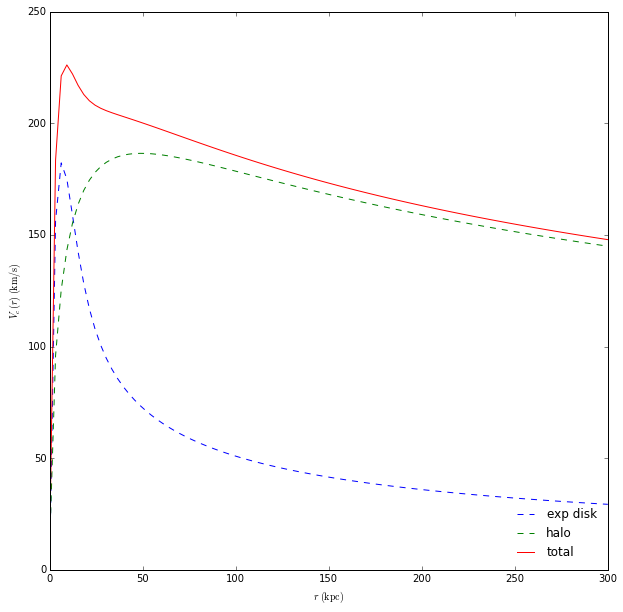

In [7]:
import numpy as np
from scipy.special import kn, iv
from matplotlib import pylab as plt
%matplotlib inline
from colossus.cosmology import cosmology
from colossus.halo.mass_so import M_to_R
from colossus.halo.concentration import concentration

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology	
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)

# a grid of dimensionless distances
y = np.linspace(0.01,50.,100)
# stellar mass of the disk and disk scale length in Msun and kpc
# the choice of scale radius is not very important for circular velocity at large R
Md = 6.e10; Rd = 3.0 
# circular velocity profile of a thin exponential disk
Vcd = 2.074e-3*np.sqrt(2.*Md/Rd*y**2*(kn(0,y)*iv(0.,y)-kn(1,y)*iv(1,y)))
r = y*2.*Rd

# mass of NFW halo in Msun, set redshift, assume median concentration
M200c = 1.e12; z=0.2
R200c = M_to_R(M200c, z, '200c')
c = concentration(M200c, '200c', z, model='diemer15')
V200c = 2.074e-3*np.sqrt(M200c/R200c)
x = r/R200c
Vch = V200c * np.sqrt((np.log(1.+c*x)-c*x/(1.+c*x))/(np.log(1.+c)-c/(1.+c))/x)
Vct = np.sqrt(Vcd**2 + Vch**2)

plt.figure(figsize=(10.,10.))
plt.xlabel(r'$r\rm\ (kpc)$'); plt.ylabel(r'$V_c(r)\ \mathrm{(km/s)}$')
plt.plot(r, Vcd, '--', label='exp disk')
plt.plot(r, Vch, '--', label='halo')
plt.plot(r, Vct, label='total')
plt.legend(loc='lower right', frameon=False)
plt.show()